<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es%2023_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mplfinance as mpf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_23_04_24_to_21_06.xlsx",)
Opções.tail(5)

,Último,Preço Teórico,Volume,Delta,Intrínseco,Taxa,Bid,Ask,Strike,Stk%,Bid.1,Ask.1,Taxa.1,Intrínseco.1,Delta.1,Volume.1,Preço Teórico.1,PT%,Último.1,U%
68,0.07,0.12,"1,57k",0.06,0.0,0.0016,0.05,0.08,51.33,0.249513,0.0,0.0,0.2289,9.83,-0.94,"47,50k",9.07,0.220789,9.50,0.231256
69,0.01,0.00,4,0.00,0.0,0.0002,0.00,0.02,60.83,0.480769,0.0,0.0,0.4407,19.33,-1.00,0,18.29,0.445229,0.00,0.000000
70,0.00,0.00,0,0.00,0.0,0.0000,0.00,0.02,61.33,0.492941,0.0,0.0,0.5012,19.83,-1.00,"2,08k",18.78,0.457157,20.80,0.506329
71,0.00,0.00,0,0.00,0.0,0.0000,0.00,0.02,64.33,0.565969,0.0,0.0,0.5060,22.83,-1.00,"378,00k",21.73,0.528968,21.00,0.511198
72,0.01,0.00,50,0.00,0.0,0.0002,0.00,0.01,85.83,1.089338,0.0,0.0,1.1241,44.33,-1.00,"4,67k",42.86,1.043330,46.65,1.135589


In [6]:
#Opções1 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
#Opções1.head(5)

In [ ]:
#Opções2 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
#Opções2.head(5)

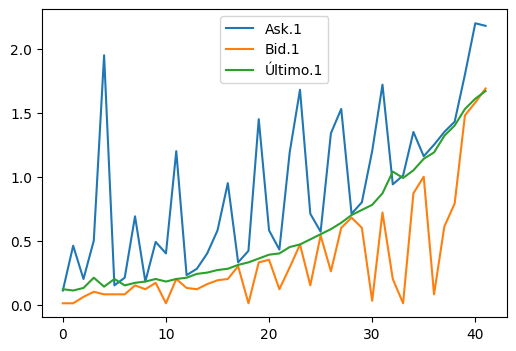

In [7]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
#PUTs_OTM1 = Opções1[(Opções1['Intrínseco.1']<=0.5)]
#PUTs_OTM2 = Opções2[(Opções2['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (6,4));

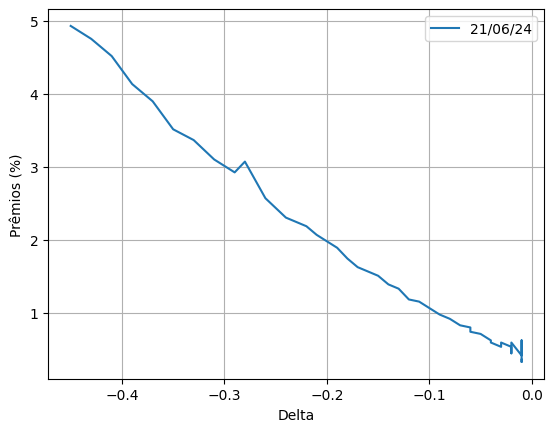

In [9]:
Ativo = 33.86
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='21/06/24')
#plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23')
#plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23-Hoje')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

In [ ]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0.5)]
CALLs_OTM1 = Opções1[(Opções1['Intrínseco']<=0.5)]

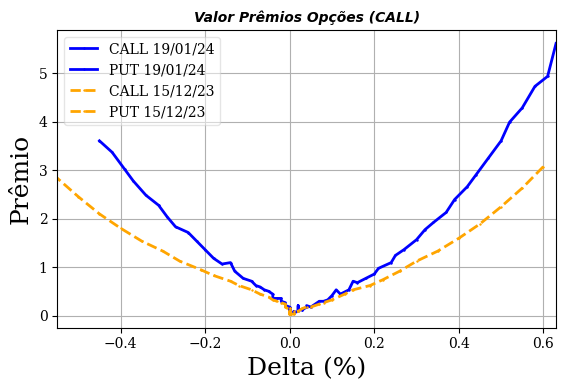

In [ ]:
# A mesma análise para as Calls
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM['Delta.1'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(CALLs_OTM1['Delta'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Delta.1'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
#plt.plot(CALLs_OTM2['Delta'],CALLs_OTM2['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
#plt.plot(PUTs_OTM2['Delta.1'],PUTs_OTM2['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+',linestyle='dashed', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

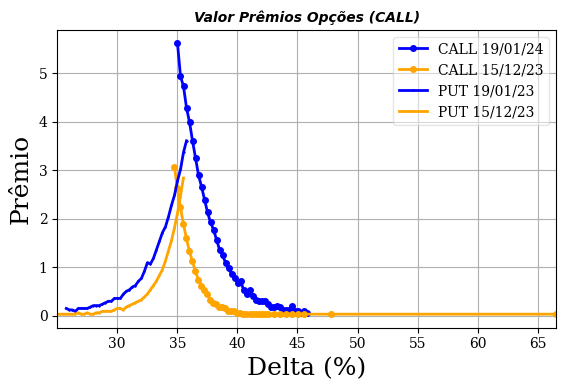

In [ ]:
# A mesma análise para as Calls em função do preço do ativo
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Strike'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(CALLs_OTM1['Strike'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='o', linewidth=2, markersize=4)
plt.plot(PUTs_OTM['Strike'],PUTs_OTM['Último.1']*100/Ativo,  label='PUT 19/01/23', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Strike'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()